Анастасия Плавина

## Тема: Градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Подберите скорость обучения (alpha) и количество итераций

In [2]:
n_features = 2
n_objects = 200

w_true = np.random.normal(size=(n_features, ))
X = np.random.uniform(-7, 7, (n_objects, n_features))
y = X.dot(w_true) + np.random.normal(0, 0.5, size=(n_objects))

n = X.shape[1]
alpha = 1e-4
W = np.array([1, 0.5])

In [3]:
def find_iters(X, W, y, alpha, with_errors=False):
    """Функция возращает количество итераций при заданной скорости обучения alpha.
    Параметр with_errors возвращает дополнительно массив ошибок
    """
    
    max_iter = 1e4
    weight_dist = np.inf
    min_weight_dist = 1e-5
    i = 0
    errors = []

    while weight_dist > min_weight_dist and i < max_iter: 
        y_pred = X.dot(W)

        new_W = W - 2 * alpha * np.dot(X.T, (y_pred - y)) / y.shape[0]
        weight_dist = np.linalg.norm(new_W - W, ord=2)

        err = np.mean((y - y_pred)**2) 
        errors.append(err)

        i += 1
        W = new_W
    
    if with_errors:
        return i, errors
    
    return i

In [4]:
alpha = 1e-4
iter_num_next, errors_before = find_iters(X, W, y, alpha, True)
iter_num = iter_num_next + 1

while iter_num > iter_num_next:
    iter_num = iter_num_next
    alpha += 1e-5
    iter_num_next = find_iters(X, W, y, alpha)

print('alpha\titer_number')
print('-----------------')
print(round(alpha, 4), '\t', iter_num)


i_top, errors_after = find_iters(X, W, y, alpha, True)

alpha	iter_number
-----------------
0.0017 	 171


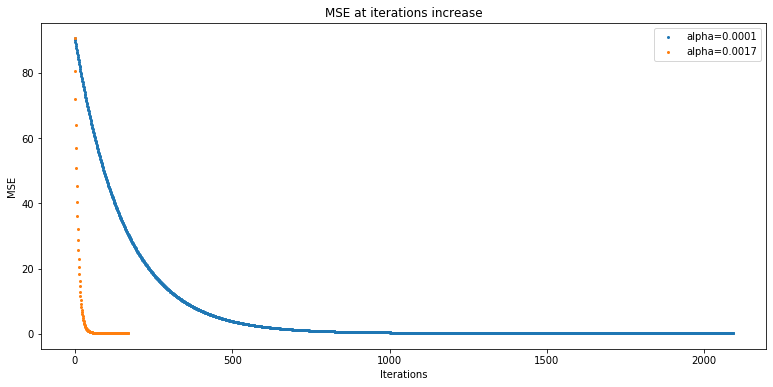

In [5]:
fig = plt.figure(figsize=(13, 6))
ax = fig.add_subplot()
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE at iterations increase')

ax.scatter(range(len(errors_before)), errors_before, s=4, label='alpha=0.0001')
ax.scatter(range(len(errors_after)), errors_after, s=4, label=f'alpha={round(alpha, 4)}')

plt.legend()
plt.show()